In [15]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Read the CSV file
df = pd.read_csv("20_21_22_Mondays(LatLon).csv")

# Create a map centered on the mean of the latitude and longitude values
map_center = [df["Lat"].mean(), df["Lon"].mean()]
map = folium.Map(location=map_center, zoom_start=10)

# Create a HeatMap layer with the solarradiation data
heat_data = df[["Lat", "Lon", "humidity"]].values.tolist()
heatmap_layer = HeatMap(heat_data, name="Solar Radiation")

# Add the HeatMap layer to the map
heatmap_layer.add_to(map)

# Display the map
map

In [6]:
import pandas as pd
import folium

df = pd.read_csv('20_21_22_Mondays(LatLon).csv')

map = folium.Map(location=[df['Lat'][0], df['Lon'][0]], zoom_start=8)

heat_data = [[row['Lat'], row['Lon'], row['solarradiation']] for index, row in df.iterrows()]
heatmap = folium.plugins.HeatMap(heat_data).add_to(map)

map


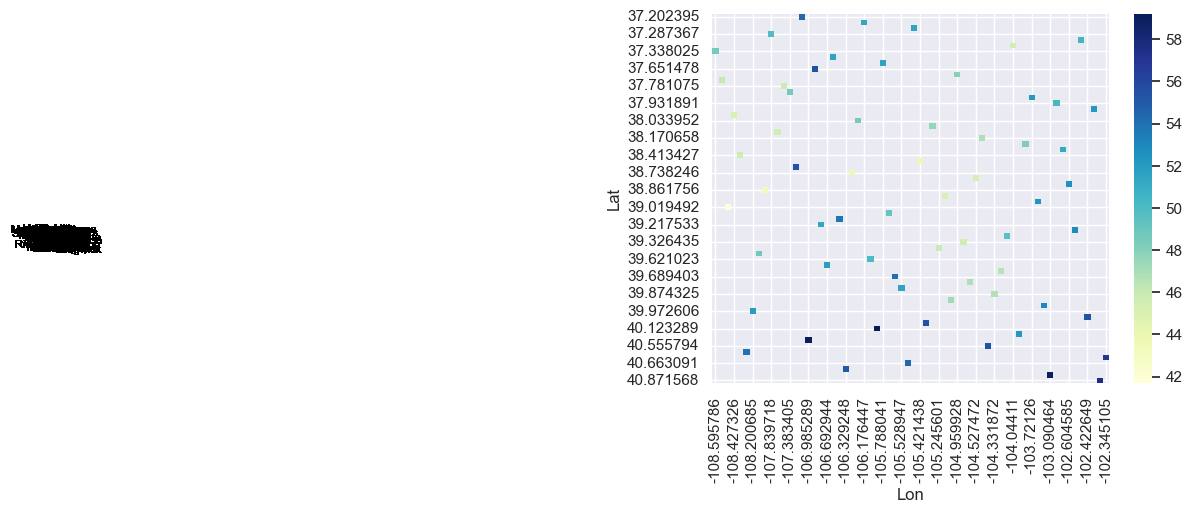

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV
df = pd.read_csv('20_21_22_Mondays(LatLon).csv')

# Create a pivot table with Lat, Lon as index and humidity as values
heatmap_df = df.pivot_table(index='Lat', columns='Lon', values='humidity')

# Create a heatmap using seaborn
sns.set()
ax = sns.heatmap(heatmap_df, cmap='YlGnBu')

# Add labels for each point
for _, row in df.iterrows():
    ax.text(row['Lon'], row['Lat'], row['County'], fontsize=8, color='black', ha='center', va='center')

# Show the plot
plt.show()


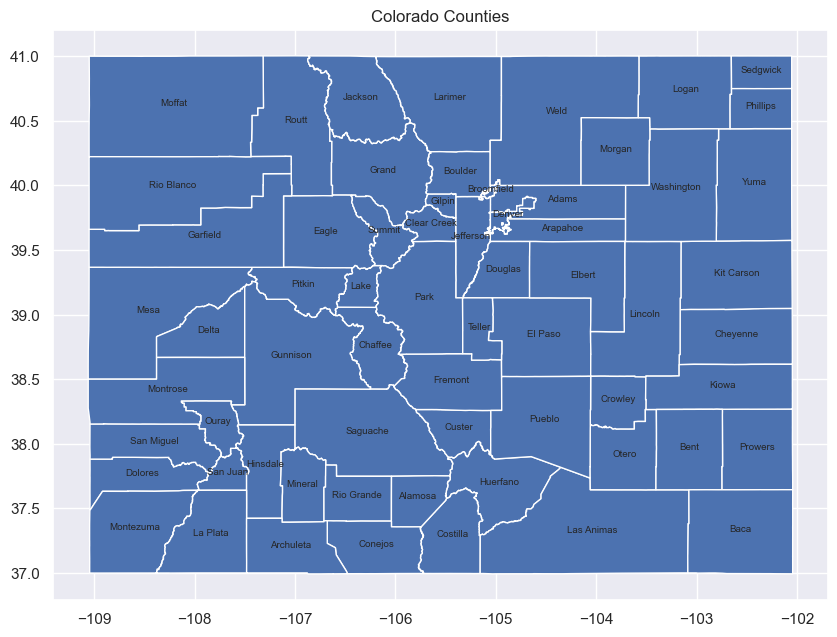

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile of Colorado county boundaries
counties = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_county_500k.zip')
colorado_counties = counties[counties['STATEFP'] == '08']

# Plot the county boundaries
fig, ax = plt.subplots(figsize=(10,10))
colorado_counties.plot(ax=ax)

# Add labels for each county
for idx, row in colorado_counties.iterrows():
    ax.annotate(text=row['NAME'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=7)

# Set the plot title
ax.set_title('Colorado Counties')

# Display the map
plt.show()


In [9]:
import geopandas as gpd
import pandas as pd
import folium

# Load the shapefile of Colorado county boundaries
counties = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_county_500k.zip')
colorado_counties = counties[counties['STATEFP'] == '08']

# Create a folium map centered on the first point in the data
df = pd.read_csv('20_21_22_Mondays(LatLon).csv')
map = folium.Map(location=[df['Lat'][0], df['Lon'][0]], zoom_start=8)

# Create a HeatMap layer using the data from the CSV file
heat_data = [[row['Lat'], row['Lon'], row['solarradiation']] for index, row in df.iterrows()]
heatmap = folium.plugins.HeatMap(heat_data).add_to(map)

# Create a GeoJson layer for the Colorado county boundaries with labels
geojson_data = colorado_counties.to_crs('EPSG:4326').to_json()
folium.GeoJson(geojson_data, name='geojson', show=True, tooltip=folium.features.GeoJsonTooltip(fields=['NAME'], aliases=['County'])).add_to(map)

folium.LayerControl().add_to(map)  # Add layer control to toggle layers on/off

map  # Show the map


In [10]:
import geopandas as gpd
import pandas as pd
import folium

# Load the shapefile of Colorado county boundaries
counties = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_county_500k.zip')
colorado_counties = counties[counties['STATEFP'] == '08']

# Create a folium map centered on the first point in the data
df = pd.read_csv('20_21_22_Mondays(LatLon).csv')
map = folium.Map(location=[df['Lat'][0], df['Lon'][0]], zoom_start=8)

# Create a HeatMap layer using the data from the CSV file
heat_data = [[row['Lat'], row['Lon'], row['solarradiation']] for index, row in df.iterrows()]
heatmap = folium.plugins.HeatMap(heat_data).add_to(map)

# Create a GeoJson layer for the Colorado county boundaries with labels
geojson_data = colorado_counties.to_crs('EPSG:4326').to_json()
folium.GeoJson(
    geojson_data, 
    name='geojson', 
    show=True, 
    tooltip=folium.features.GeoJsonTooltip(fields=['NAME'], aliases=['County']), 
    style_function=lambda x: {
        'fillColor': 'black', 
        'color': 'black', 
        'weight': 1, 
        'fillOpacity': 0.1,
    },
).add_to(map)

folium.LayerControl().add_to(map)  # Add layer control to toggle layers on/off

map  # Show the map


In [16]:
import geopandas as gpd
import pandas as pd
import folium

# Load the shapefile of Colorado county boundaries
counties = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_county_500k.zip')
colorado_counties = counties[counties['STATEFP'] == '08']

# Create a folium map centered on the first point in the data
df = pd.read_csv('20_21_22_Mondays(LatLon).csv')
map = folium.Map(location=[df['Lat'][0], df['Lon'][0]], zoom_start=8)

# Create a HeatMap layer using the data from the CSV file
heat_data = [[row['Lat'], row['Lon'], row['humidity']] for index, row in df.iterrows()]
heatmap = folium.plugins.HeatMap(heat_data).add_to(map)

# Create a GeoJson layer for the Colorado county boundaries with labels
geojson_data = colorado_counties.to_crs('EPSG:4326').to_json()
folium.GeoJson(
    geojson_data, 
    name='geojson', 
    show=True, 
    tooltip=folium.features.GeoJsonTooltip(fields=['NAME'], aliases=['County']), 
    style_function=lambda x: {
        'fillColor': 'black', 
        'color': 'black', 
        'weight': 1, 
        'fillOpacity': 0.1,
    },
).add_to(map)

folium.LayerControl().add_to(map)  # Add layer control to toggle layers on/off

map  # Show the map


In [14]:
import geopandas as gpd
import pandas as pd
import folium

# Load the shapefile of Colorado county boundaries
counties = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_county_500k.zip')
colorado_counties = counties[counties['STATEFP'] == '08']

# Create a folium map centered on the first point in the data
df = pd.read_csv('20_21_22_Mondays(LatLon).csv')
map = folium.Map(location=[df['Lat'][0], df['Lon'][0]], zoom_start=8)

# Create a HeatMap layer using the data from the CSV file
heat_data = [[row['Lat'], row['Lon'], row['cloudcover']] for index, row in df.iterrows()]
heatmap = folium.plugins.HeatMap(heat_data).add_to(map)

# Create a GeoJson layer for the Colorado county boundaries with labels
geojson_data = colorado_counties.to_crs('EPSG:4326').to_json()
folium.GeoJson(
    geojson_data, 
    name='geojson', 
    show=True, 
    tooltip=folium.features.GeoJsonTooltip(fields=['NAME'], aliases=['County']), 
    style_function=lambda x: {
        'fillColor': 'black', 
        'color': 'black', 
        'weight': 1, 
        'fillOpacity': 0.1,
    },
).add_to(map)

folium.LayerControl().add_to(map)  # Add layer control to toggle layers on/off

map  # Show the map


In [17]:
import geopandas as gpd
import pandas as pd
import folium

# Load the shapefile of Colorado county boundaries
counties = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_county_500k.zip')
colorado_counties = counties[counties['STATEFP'] == '08']

# Create a folium map centered on the first point in the data
df = pd.read_csv('20_21_22_Mondays(LatLon).csv')
map = folium.Map(location=[df['Lat'][0], df['Lon'][0]], zoom_start=8)

# Create a HeatMap layer using the data from the CSV file
heat_data = [[row['Lat'], row['Lon'], row['AVG Temp']] for index, row in df.iterrows()]
heatmap = folium.plugins.HeatMap(heat_data).add_to(map)

# Create a GeoJson layer for the Colorado county boundaries with labels
geojson_data = colorado_counties.to_crs('EPSG:4326').to_json()
folium.GeoJson(
    geojson_data, 
    name='geojson', 
    show=True, 
    tooltip=folium.features.GeoJsonTooltip(fields=['NAME'], aliases=['County']), 
    style_function=lambda x: {
        'fillColor': 'black', 
        'color': 'black', 
        'weight': 1, 
        'fillOpacity': 0.1,
    },
).add_to(map)

folium.LayerControl().add_to(map)  # Add layer control to toggle layers on/off

map  # Show the map


In [18]:
import geopandas as gpd
import pandas as pd
import folium

# Load the shapefile of Colorado county boundaries
counties = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_county_500k.zip')
colorado_counties = counties[counties['STATEFP'] == '08']

# Create a folium map centered on the first point in the data
df = pd.read_csv('20_21_22_Mondays(LatLon).csv')
map = folium.Map(location=[df['Lat'][0], df['Lon'][0]], zoom_start=8)

# Create a HeatMap layer using the data from the CSV file
heat_data = [[row['Lat'], row['Lon'], row['Potential Energy (W/m^2)']] for index, row in df.iterrows()]
heatmap = folium.plugins.HeatMap(heat_data).add_to(map)

# Create a GeoJson layer for the Colorado county boundaries with labels
geojson_data = colorado_counties.to_crs('EPSG:4326').to_json()
folium.GeoJson(
    geojson_data, 
    name='geojson', 
    show=True, 
    tooltip=folium.features.GeoJsonTooltip(fields=['NAME'], aliases=['County']), 
    style_function=lambda x: {
        'fillColor': 'black', 
        'color': 'black', 
        'weight': 1, 
        'fillOpacity': 0.1,
    },
).add_to(map)

folium.LayerControl().add_to(map)  # Add layer control to toggle layers on/off

map  # Show the map